# Conor Kennedy - 16722649

# COMP20230: Data Structures & Algorithms - Assignment 2

### Learning Outcomes
    
<i>On successful completion of this project the learner will be able to:
    
- Run and assess the performance of various sorting algorithms
- Apply and run Dijkstra’s shortest path algorithm and discuss your results.
- Identify the optimal bridge building solution to connect 7 islands using a Minimum Spanning Tree and Prim’s Algorithm.
</i>

This notebook is separated into different parts following the outline of the assignment details. In the different sections, work has been carried out other than what was requested for further investigation into the different problems.

The following is an overview of what is included in the different sections in this notebook:

- ### Part 1:
       - An introduction of the different algorithms and their  Big O complexity
       - Implementing the different functions that will be used for this analysis.
       - Unittests for each of these algorithms
       - Calculating the runtimes of these algorithms on reversed lists of different lengths (as specified in assignment details) and   displaying the findings on graphs.
       - Calculating the runtimes of these algorithms on ordered lists of different lengths and displaying the findings on graphs.
       - Comparison of the algorithms on the ordered/reversed lists.
       - The performance and complexity of the algorithms will be discussed throughout this section.
       
- ### Part 2:
       - Please see attached document "drawings.pdf" for the shortest path.
       - Using networkX Python package to create a graph
       - Using a networkX built in function to find the shortest path and from this creating the shortest path tree.
       - A graph's shortest path tree will be made using Dijkstra's algorithm (as specified in the assignment).
       
- ### Part 3:
       - Please see attached document "drawings.pdf" for the first part of the Minimum Spanning Tree problem.
       - Using Prim's algorithm, the Minimum Spanning Tree was calculated and drawn.
       
Please note: Any references used throughout this assignment have been commented in the code. For parts 2 & 3, please refer to the PDF document attached in this folder for the first parts of their questions answered. Due to colour blindness, some of the lines in the graph in this notebook are drawn using the same colour (black) as the the x and y axis to make it easier to distinguish between the different colours and interpret the results.

In [23]:
from time import perf_counter
from matplotlib import pyplot
import matplotlib.pyplot as plt
import unittest
import math
import networkx as nx
import matplotlib.pyplot as plt
import sys
from networkx import tree
from networkx.algorithms import tree

# Part 1

## Run and assess the performance of various sorting algorithms

### Introduction

This part examines the efficiency of sorting algorithms by monitoring their runtimes. The following is a description of the algorithms looked at in this section:

   - Bubble Sort: The algorithm goes through each element in the list and swaps with the adjacent item if they are not in order. This is repeated until there are no more swaps to be carried out. As there is a nested loop in the algorithm and for n items, there is n possible swaps, it is O(n^2). The lower bound or Big-Ω would be Ω(n). This is when the algorithm goes through n elements but does not need to swap any. The below algorithm for bubble sort is not optimised for this and thus a second bubble sort algorithm was implemented.
   
   <br>
    
   - Merge Sort: This is a divide and conquer algorithm (breaking the problem into smaller problems in order to solve it). It is a recursive algorithm which continually splits the lists in half. Once the lists are sorted, the fundamental operation known as the merge occurs. In terms of time complexity, it is O(nlog(n)). As was shown in Assignment 1 with binary search, dividing a list in half can be done log(n) times with n being equal to the size of the list. With the case of the Merge Sort algorithm, there is also the need to merge the elements back together (when they are sorted). Each element in the list is processed in linear time which results in O(nlog(n)). In terms of the lower bound, the merge sort has the same time complexity. This is because regardless of the list being sorted or unsorted, the same operations are carried out. 
   
   <br>
    
   - Quick Sort: This is another divide and conquer algorithm. The algorithm requires a pivot to be selected and elements are placed to the right or left of this element depending on whether they are smaller or larger. This process continues until it is left with single elements. In the case of the algorithm below, the pivot is at index 0. For the reversed list, this will mean that all the elements will be put to the right each time the pivot is selected. This means that the list of n items is being divided into a list of 0 elements and n-1 elements, then 0 elements and n-2 elements on the next level and so on. This results in Big O complexity of O(n^2). For the lower-bound, it is Ω(n(log(n)). This is because the list keeps getting divided in half with n/2 elements going to the right and left of the pivot. As explained in merge sort, this is log(n) complexity. It is multiplied by n for the number of elements it processes. 
    
    
Variations of these algorithms have been implemented to see if their performance is any different. Each algorithm has been looked at with reversed and ordered lists of varying size. Results of the different outcomes in terms of Big O complexity has been included throughout.


Code for computing the average runtimes has been taken from my Assignment 1 submission as recommended. 

### Implementing the Sorting Algorithms 

In [1]:
#from lab 6 on sorting algorithms - Bubble Sort Algorithm

def bubble_sort(arr):  #intializing the function
    arr_size = len(arr)  #storing the size of the array in a variable
    for i in range(arr_size):  #for in range 0 - size of the array
        for j in range(i, arr_size):  #for j in range i - size of array
            if arr[i] > arr[j]:  #if index i of array is greater than index j of the array
                arr[i], arr[j] = arr[j], arr[i]  #swapping the numbers
    return arr   #return the new, sorted array



In [12]:
#Optimized implementation of Bubble Sort - https://www.geeksforgeeks.org/bubble-sort/
#very similar to above algorithm except for a few minor changes
#kept in both algorithms for comparison
# More efficient for when the pair of numbers being looked at are already in order and hence do not need to be swapped

def optimized_bubbleSort(arr):   #initializing the function
    array_size = len(arr)        #storing the length of the array in a variable
  
    
    for i in range(array_size): #going through the array elements
        swapped = False         #swapped is false
        for j in range(0, array_size-i-1): 
            if arr[j] > arr[j+1] :  #if element at index i is greater than element at index j + 1
                arr[j], arr[j+1] = arr[j+1], arr[j]  #swapping the numbers if left bigger than right
                swapped = True   #swapped is equal to true
        if swapped == False:   #break if no elements were swapped
            break
    return arr    #return the array

In [2]:
#from lab 6 on sorting algorithms - Quicksort Algorithm

def partition(arr, low, high):     #function with three parameters
    """Return a pivot element for Quicksort."""
    key = arr[high]   #key is equal to the element at the last index
    pivot = low       #pivot is equal 0
    for i in range(low, high): #for i in range 0 - list size
        if arr[i] <= key:     #if element at i is less than or equal to key
            arr[i], arr[pivot] = arr[pivot], arr[i]   #swap
            pivot += 1   #add 1 to pivot

    arr[pivot], arr[high] = arr[high], arr[pivot]    #element a pivot is equal to element at index high, element at index high is equal to element at index pivot
    return pivot   #return pivot


def quicksort(arr, low=0, high=None):  #quick sort algorithm
    if high is None:  
        high = len(arr)-1   #high is equal to size of array minus 1
    
    if high < low:       
        return
    else:
        pivot = partition(arr, low, high)   #array into partition function
        quicksort(arr, low, pivot-1)        
        quicksort(arr, pivot+1, high)
        
    return arr

In [23]:
#Reference - https://github.com/rusty-sj/Algorithms-Design-Analysis-and-Implementations/blob/bed31d24135c415bdeabab90f2b1028d67d35224/hw2%20-%20sorting%20techniques%20and%20proof%20of%20correctness/hw2.py
#This is getting the middle element as the pivot

def quick_sort_middle(numbers, low=0, high=None):
    if high is None:
        high = len(numbers) - 1
        
    if low >= high:
        return
    partition_index = partition(numbers, low, high)
    quick_sort_middle(numbers, low, partition_index - 1)
    quick_sort_middle(numbers, partition_index, high)
    
    return numbers


def partition(numbers, low, high):
    pivot = numbers[(low + high) // 2]  # Take middle element as pivot
    while low <= high:
        while numbers[low] < pivot:
            low += 1
        while numbers[high] > pivot:
            high -= 1
        if low <= high:
            numbers[low], numbers[high] = numbers[high], numbers[low]
            # swap(numbers, low, high)
            low += 1
            high -= 1
    return low  # new partition position, every left is smaller than pivot, every right is bigger than pivot

In [27]:
#from lab 6 on sorting algorithms - Merge Sort Algorithm

def merge(left, right):
    result = []  #creating an empty list
    left_idx, right_idx = 0, 0   #assigning two variables left_idx and right_idx to 0
    while left_idx < len(left) and right_idx < len(right):  #while the length of the left and right is greater than 0
        if left[left_idx] <= right[right_idx]:  #if at the index 'left_idx' is less than the index 'right_idx' in the right array
            result.append(left[left_idx])      #add the element to the empty list created named 'result'
            left_idx += 1  #add 1 to the variable
        else:
            result.append(right[right_idx])   #else if the number on the right side was smaller, add this element to the result list
            right_idx += 1   #add 1 to the index
 
    if left:  #adding rest of elements to the result list
        result.extend(left[left_idx:])
    if right:
        result.extend(right[right_idx:])
    return result  

def mergesort(arr):
    if len(arr) <= 1:  
        return arr  #array is already sorted so return as is
 
    mid = len(arr) // 2    #variable mid is equal to the size of the array divided by two
    left = arr[:mid]       #left is equal to the elements up to the mid point
    right = arr[mid:]      #right includes the midpoint and all elements that follow
 
    left = mergesort(left) #calling mergesort function on the left array
    right = mergesort(right)  #calling mergesort function on the right
    return list(merge(left, right))   #return as a list the result from the merge function

## Unittests on the algorithms

In [8]:
#testing the algorithms are working as intended
#each algorithm sorting a reversed list

test_list_ordered = list(range(5))
list_reversed_test = list(reversed(test_list_ordered))
list_reversed_test_two = list(reversed(test_list_ordered))
list_reversed_test_three = list(reversed(test_list_ordered))
list_reversed_test_four = list(reversed(test_list_ordered))
list_reversed_test_five = list(reversed(test_list_ordered))



In [9]:
#Unittests

class TestSortingAlgorithms(unittest.TestCase):

    def test_bubble(self):
        self.assertEqual(bubble_sort(list_reversed_test), [0, 1, 2, 3, 4])
    
    def test_optimized_bubble(self):
        self.assertEqual(optimized_bubbleSort(list_reversed_test_two), [0, 1, 2, 3, 4])
        
    def test_quick_sort_middle(self):
        self.assertEqual(quick_sort_middle(list_reversed_test_four), [0, 1, 2, 3, 4])
    
    def test_merge_sort(self):
        self.assertEqual(mergesort(list_reversed_test_five), [0, 1, 2, 3, 4])
    
    
    
unittest.main(argv=[''], verbosity=2, exit=False)

test_bubble (__main__.TestSortingAlgorithms) ... ok
test_merge_sort (__main__.TestSortingAlgorithms) ... ok
test_optimized_bubble (__main__.TestSortingAlgorithms) ... ok
test_quick_sort_middle (__main__.TestSortingAlgorithms) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.011s

OK


## Calculating the Runtimes on a list that has been reversed

In [4]:
#making list with numbers 0 - 500

list_ordered = list(range(500))

In [5]:
#reversing the order of the list [500, 499,.....,0]

list_reversed = list(reversed(list_ordered))

In [6]:
def running_time(func):  #function to get the running time of a function
    time_taken = []      #empty list that will be used to store the times taken 
    subsequence_list = []          #this is the list that the sorting algorithm will be going through
    for i in list_reversed:       #going through each integer in the reversed list
        sum_time = 0              #setting variable to 0 - will be used for computing the average
        subsequence_list.append(i)   #add element to the list, keeps getting larger by one integer value 
        for x in range(100):         #the average here is taken over 100 iterations
            start_time = perf_counter()     #start the timer
            func(subsequence_list)   #sorting the subsequence_list 
            stop_time = perf_counter()     #stopping the timer
            elapsed_time = stop_time - start_time    #getting the time that has passed since starting the timer
            sum_time = sum_time + elapsed_time       #summing the times
        average_time = sum_time / 100        #getting the average
        time_taken.append(average_time)    #adding the average time taken to the list made at the start of the function
    return time_taken

In [19]:
#each algorithm follows same method - calling the running_time function and inputting the algorithm as parameter

bubble_sort_times = running_time(bubble_sort)

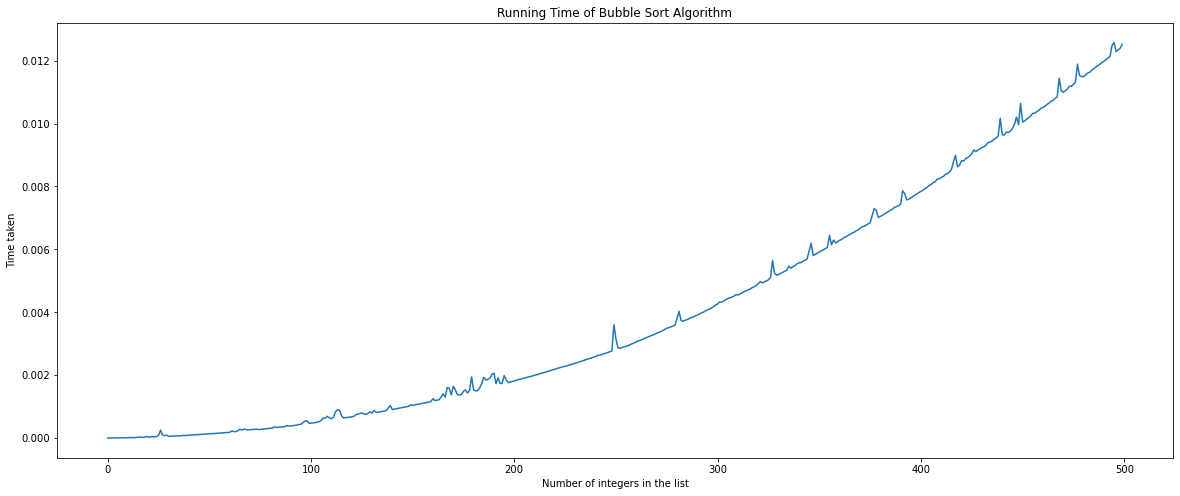

In [20]:
#plotting the graph. Run times on the y-axis and the number of integers in the list along the x-axis.
plt.figure(figsize=(20,8))
plt.xlabel('Number of integers in the list')
plt.ylabel('Time taken')
plt.title('Running Time of Bubble Sort Algorithm')
plt.plot(list_ordered, bubble_sort_times)

As expected, the graph displays a curve symbolising O(n^2).

In [59]:
optimized_bubble_sort_times = running_time(optimized_bubbleSort)

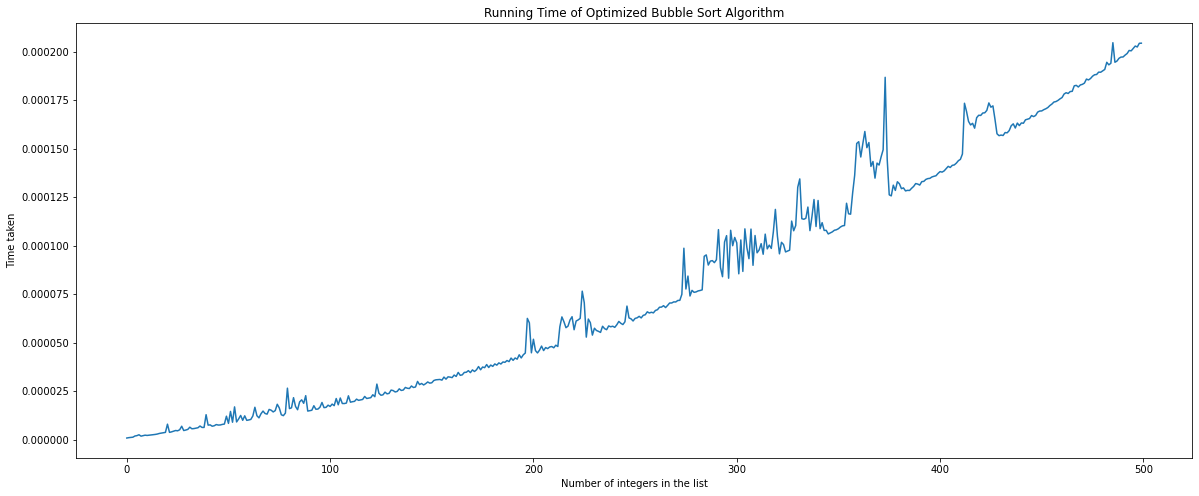

In [60]:
#plotting the graphs. Run times on the y-axis and the number of integers in the list along the x-axis.
plt.figure(figsize=(20,8))
plt.xlabel('Number of integers in the list')
plt.ylabel('Time taken')
plt.title('Running Time of Optimized Bubble Sort Algorithm')
plt.plot(list_ordered, optimized_bubble_sort_times)

As expected, the graph displays a curve symbolising O(n^2). Worth noting that the algorithm runs much faster than the original bubble sort algorithm due to the change in the <code>for loop</code>

In [9]:
quick_sort_times = running_time(quicksort)

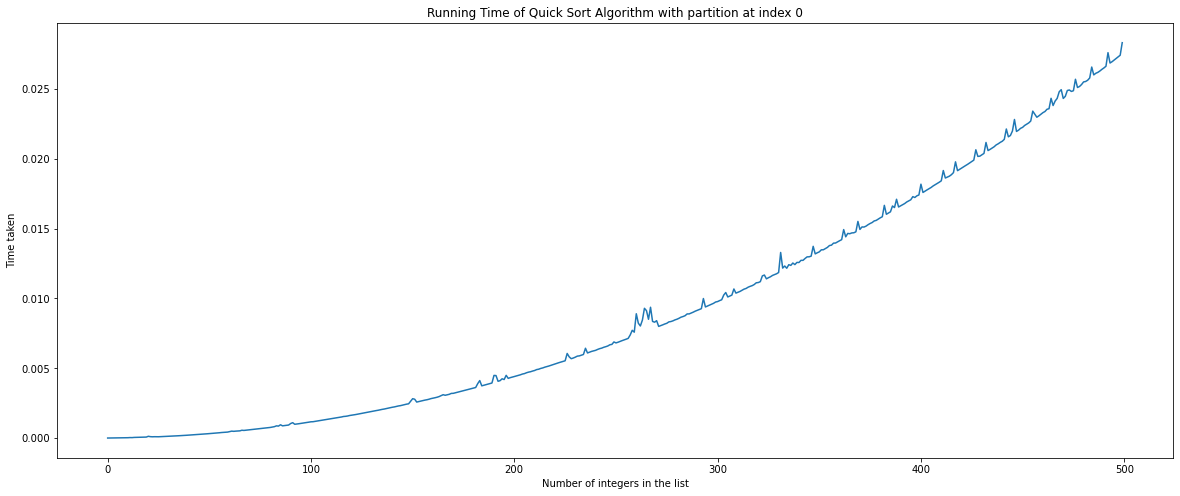

In [50]:
#plotting the graphs. Run times on the y-axis and the number of integers in the list along the x-axis.
plt.figure(figsize=(20,8))
plt.xlabel('Number of integers in the list')
plt.ylabel('Time taken')
plt.title('Running Time of Quick Sort Algorithm with partition at index 0')
plt.plot(list_ordered, quick_sort_times)

As expected, the graph displays a curve symbolising O(n^2).

In [24]:
quick_sort_middle_times = running_time(quick_sort_middle)

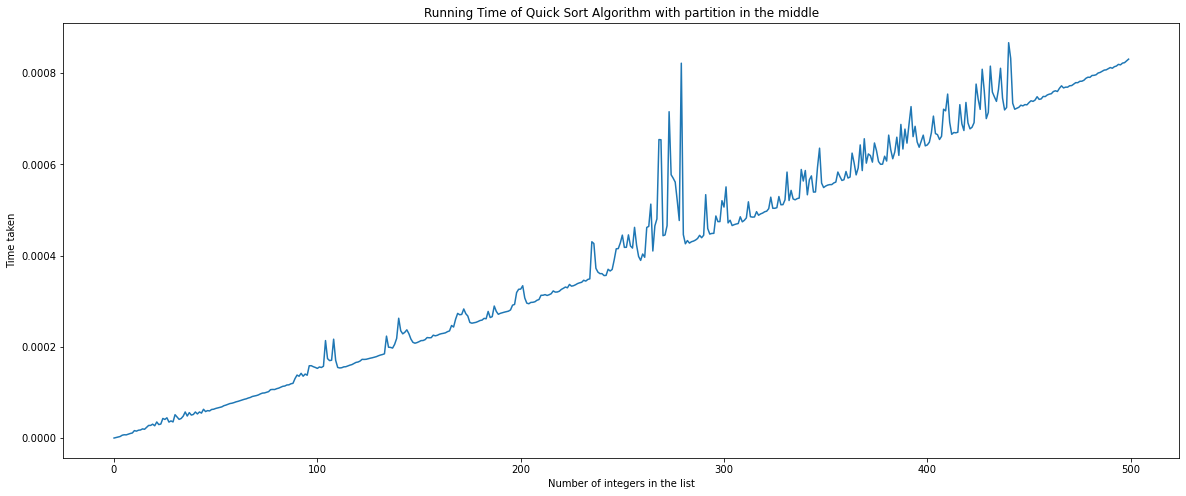

In [49]:
#plotting the graphs. Run times on the y-axis and the number of integers in the list along the x-axis.
plt.figure(figsize=(20,8))
plt.xlabel('Number of integers in the list')
plt.ylabel('Time taken')
plt.title('Running Time of Quick Sort Algorithm with partition in the middle')
plt.plot(list_ordered, quick_sort_middle_times)

The graph suggests that the Quick Sort is running in O(n). This is not the case however (it is running in O(nlog(n)) as graphs further on will show more clearly. 

In [28]:
merge_sort_times = running_time(mergesort)

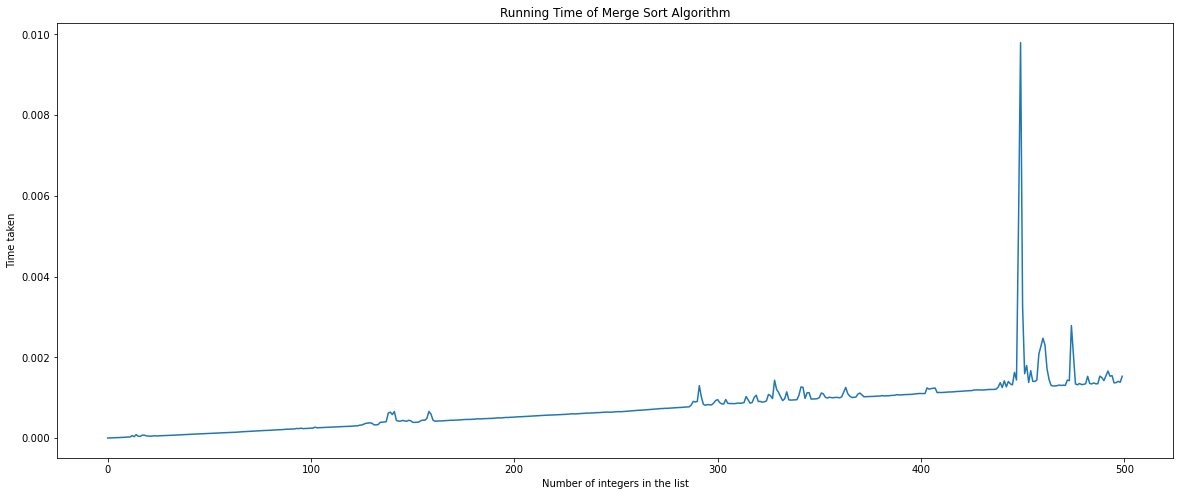

In [51]:
#plotting the graphs. Run times on the y-axis and the number of integers in the list along the x-axis.
plt.figure(figsize=(20,8))
plt.xlabel('Number of integers in the list')
plt.ylabel('Time taken')
plt.title('Running Time of Merge Sort Algorithm')
plt.plot(list_ordered, merge_sort_times)

As expected, merge sort showing that it is running in O(nlog(n)). 

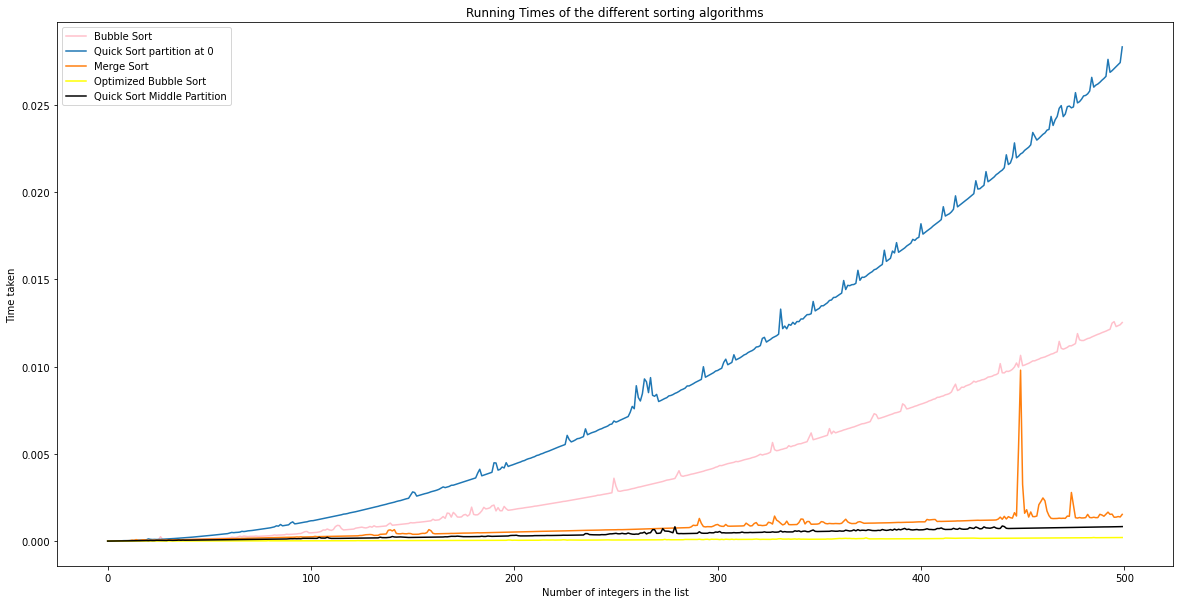

In [64]:
#Plotting all three sorting algorithms and associated run times on the same graph for comparison.

plt.figure(figsize=(20,10))
plt.xlabel('Number of integers in the list')
plt.ylabel('Time taken')
plt.title('Running Times of the different sorting algorithms')
plt.plot(list_ordered, bubble_sort_times, label='Bubble Sort', color="pink")
plt.plot(list_ordered, quick_sort_times, label='Quick Sort partition at 0')
plt.plot(list_ordered, merge_sort_times, label='Merge Sort')
plt.plot(list_ordered, optimized_bubble_sort_times, label='Optimized Bubble Sort', color="yellow")
plt.plot(list_ordered, quick_sort_middle_times, label='Quick Sort Middle Partition', color="black")
plt.legend()

- Bubble Sort and Quick Sort with partition at 0 are as expected with running time increasing drastically with the length of the input increasing - O(n^2).
- Optimized bubble sort is working considerably faster than the rest of the algorithms due to the way it has been implemented. It is however similar to the bubble sort graph with O(n^2) as above showed.
- Can see here that the Quick Sort Middle Partition has time complexity of O(nlog(n)) - similar to the merge sort. 

## Run Times on different length ordered lists

In [191]:
def ordered_running_time(func):  #function to get the running time of a function
    time_taken = []      #empty list that will be used to store the times taken 
    subsequence_list = []          #this is the list that the sorting algorithm will be going through
    for i in list_ordered:       #going through each integer in the ordered list
        sum_time = 0              #setting variable to 0 - will be used for computing the average
        subsequence_list.append(i)   #add element to the list, keeps getting larger by one integer value 
        for x in range(100):         #the average here is taken over 100 iterations
            start_time = perf_counter()     #start the timer
            func(subsequence_list)   #sorting the subsequence_list 
            stop_time = perf_counter()     #stopping the timer
            elapsed_time = stop_time - start_time    #getting the time that has passed since starting the timer
            sum_time = sum_time + elapsed_time       #summing the times
        average_time = sum_time / 100        #getting the average
        time_taken.append(average_time)    #adding the average time taken to the list made at the start of the function
    return time_taken

In [32]:
bubble_sort_times_ordered = ordered_running_time(bubble_sort)

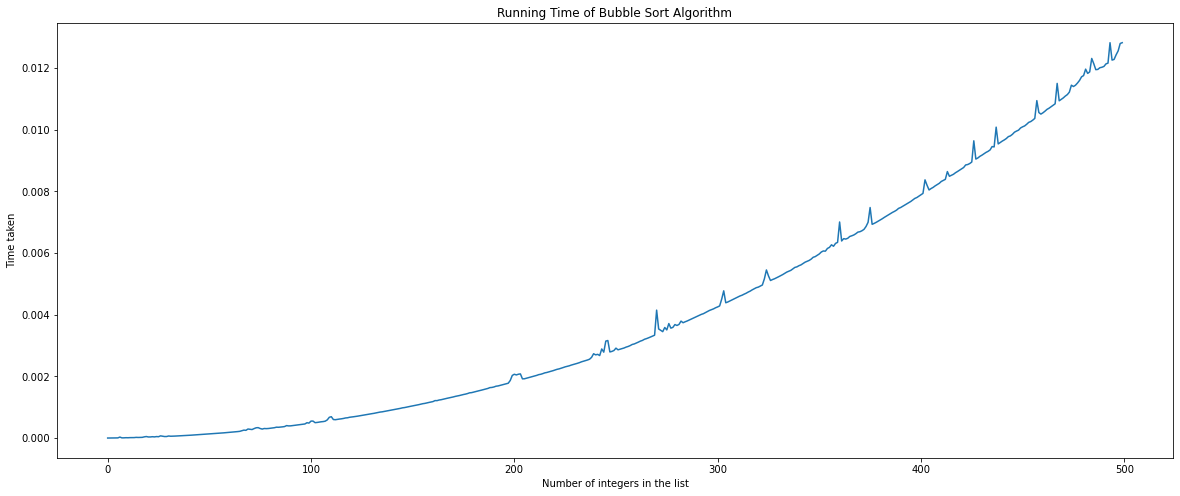

In [33]:
#plotting the graphs. Run times on the y-axis and the number of integers in the list along the x-axis.
plt.figure(figsize=(20,8))
plt.xlabel('Number of integers in the list')
plt.ylabel('Time taken')
plt.title('Running Time of Bubble Sort Algorithm')
plt.plot(list_ordered, bubble_sort_times_ordered)

As expected, the graph displays a curve symbolising O(n^2). Even though the list is ordered, the bubble sort algorithm imlpemented still goes through each item and checks, thus not efficient for sorted lists.

In [35]:
optimized_bubble_sort_times_ordered = ordered_running_time(optimized_bubbleSort)

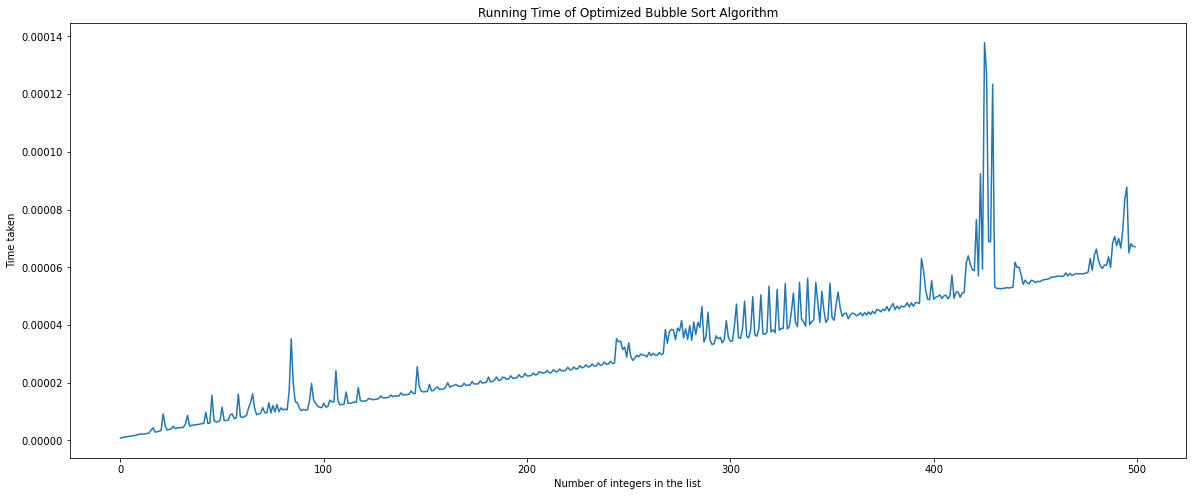

In [52]:
#plotting the graphs. Run times on the y-axis and the number of integers in the list along the x-axis.
plt.figure(figsize=(20,8))
plt.xlabel('Number of integers in the list')
plt.ylabel('Time taken')
plt.title('Running Time of Optimized Bubble Sort Algorithm')
plt.plot(list_ordered, optimized_bubble_sort_times_ordered)

Clearly a linear line is displayed conveying Big O complexity O(n). This is because no elements were swapped so the algorithm just goes through the n elements in the list.

In [6]:
quick_sort_times_ordered = ordered_running_time(quicksort)

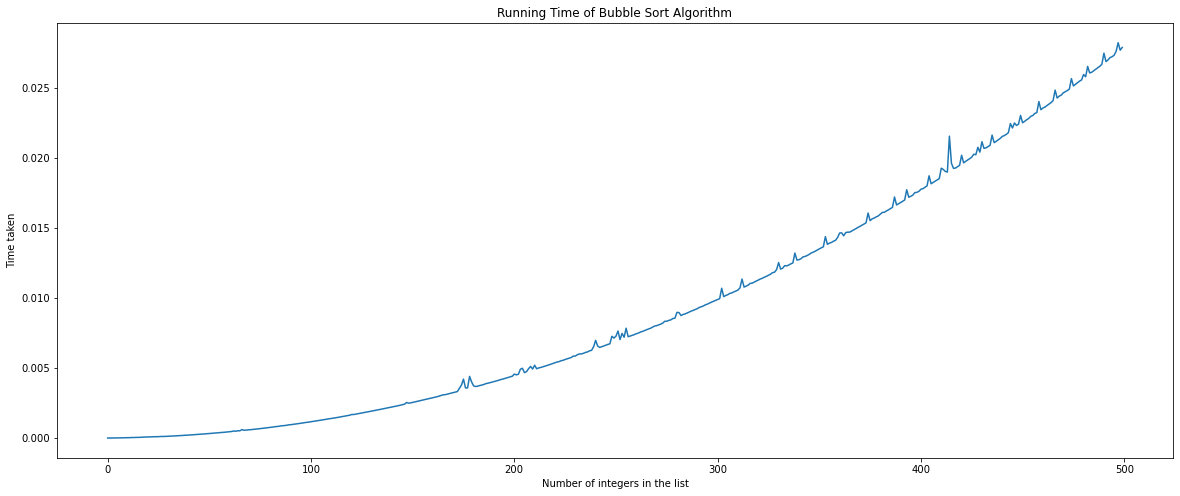

In [7]:
#plotting the graphs. Run times on the y-axis and the number of integers in the list along the x-axis.
plt.figure(figsize=(20,8))
plt.xlabel('Number of integers in the list')
plt.ylabel('Time taken')
plt.title('Running Time of Bubble Sort Algorithm')
plt.plot(list_ordered, quick_sort_times_ordered)

O(n^2) - same process is being carried out. In this instance, with partition at 0 on the sorted list, all elements will be larger and thus constantly be put to the right at each partition.

In [40]:
quick_sort_middle_times_ordered = ordered_running_time(quick_sort_middle)

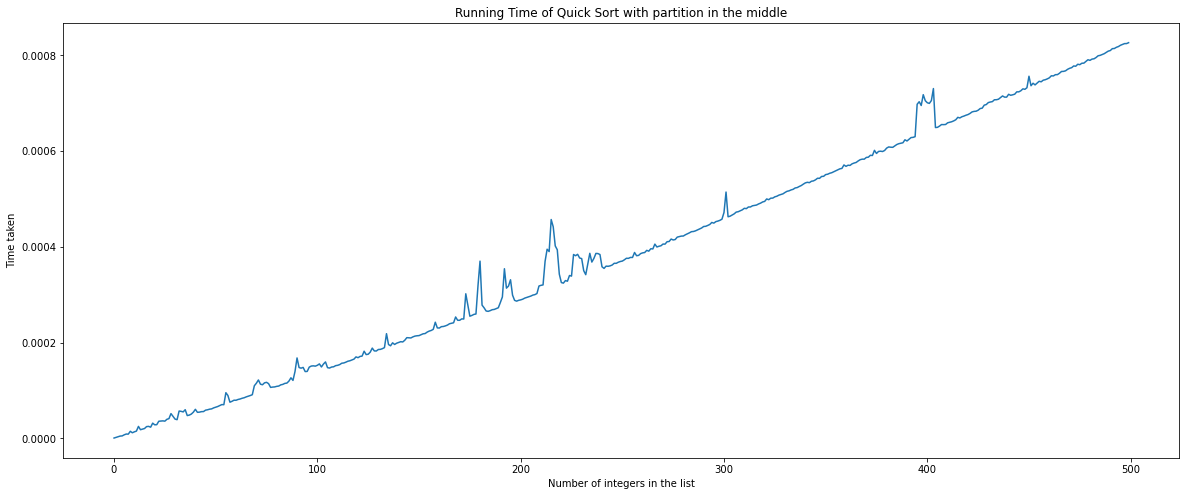

In [53]:
#plotting the graphs. Run times on the y-axis and the number of integers in the list along the x-axis.
plt.figure(figsize=(20,8))
plt.xlabel('Number of integers in the list')
plt.ylabel('Time taken')
plt.title('Running Time of Quick Sort with partition in the middle')
plt.plot(list_ordered, quick_sort_middle_times_ordered)

Not clear here but with the pivot in the centre (and as the list is ordered), there will be n/2 to the left and right of this partition at each level - O(nlog(n)).

In [66]:
merge_sort_times_ordered = ordered_running_time(mergesort)

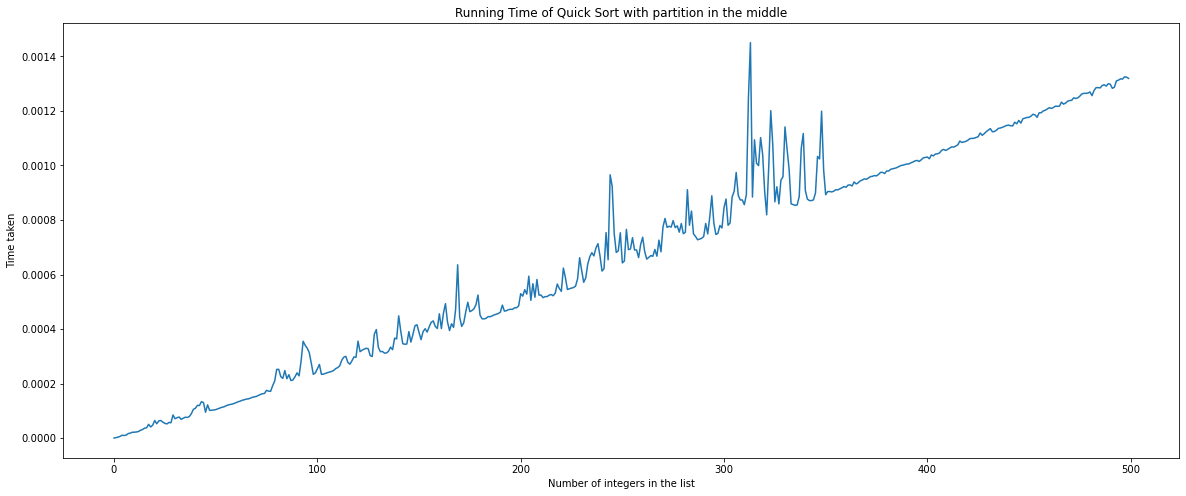

In [67]:
#plotting the graphs. Run times on the y-axis and the number of integers in the list along the x-axis.
plt.figure(figsize=(20,8))
plt.xlabel('Number of integers in the list')
plt.ylabel('Time taken')
plt.title('Running Time of Merge Sort with partition in the middle')
plt.plot(list_ordered, merge_sort_times_ordered)

Again, graph not clear here for merge sort(please see below graph comparing the different algorithms) - O(nlog(n)).

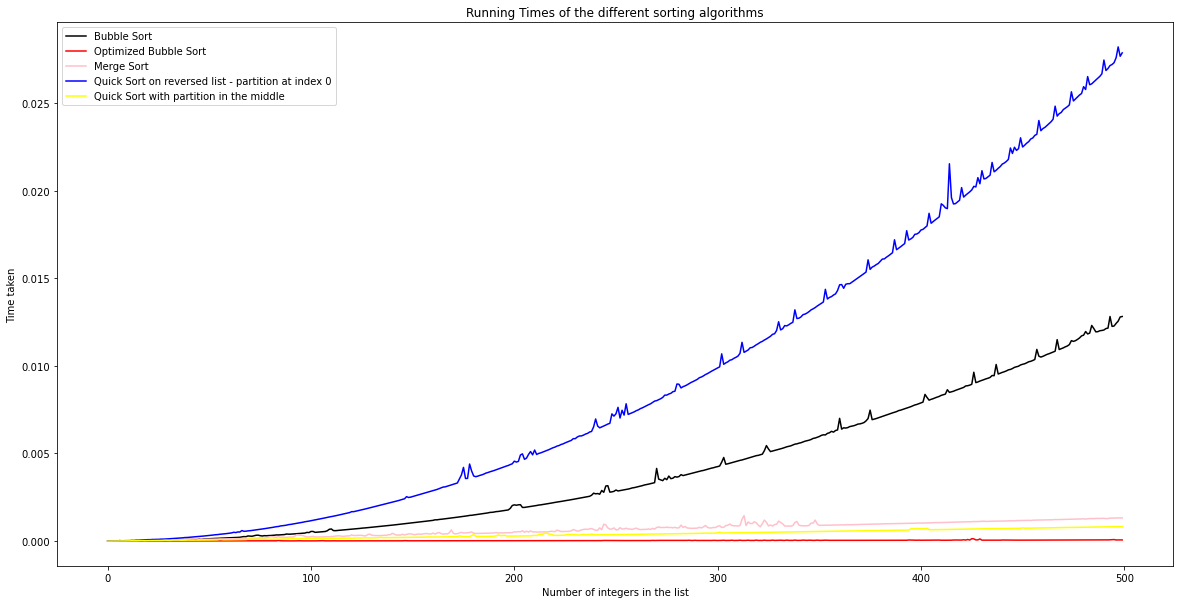

In [14]:
#Plotting all three sorting algorithms and associated run times on the same graph for comparison.

plt.figure(figsize=(20,10))
plt.xlabel('Number of integers in the list')
plt.ylabel('Time taken')
plt.title('Running Times of the different sorting algorithms')
plt.plot(list_ordered, bubble_sort_times_ordered, label='Bubble Sort', color="black")
plt.plot(list_ordered, optimized_bubble_sort_times_ordered, label='Optimized Bubble Sort', color="red")
plt.plot(list_ordered, merge_sort_times_ordered, label='Merge Sort', color="pink")
plt.plot(list_ordered, quick_sort_times_ordered, label='Quick Sort - partition at index 0', color="blue")
plt.plot(list_ordered, quick_sort_middle_times_ordered, label='Quick Sort with partition in the middle', color="yellow")
plt.legend()

Can see the results of the algorithms and how they compare to one another:
- Quick sort with partition at 0 and Bubble Sort both have complexity O(n^2).
- Not clear here due to the efficiency of the algorithm but the optimized bubble sort complexity here is O(n).
- Merge sort and Quick sort with partition in the middle have complexity of O(nlog(n)). 

# Comparing the Run Times of the same type of sorting techique on the different sequences and lengths:

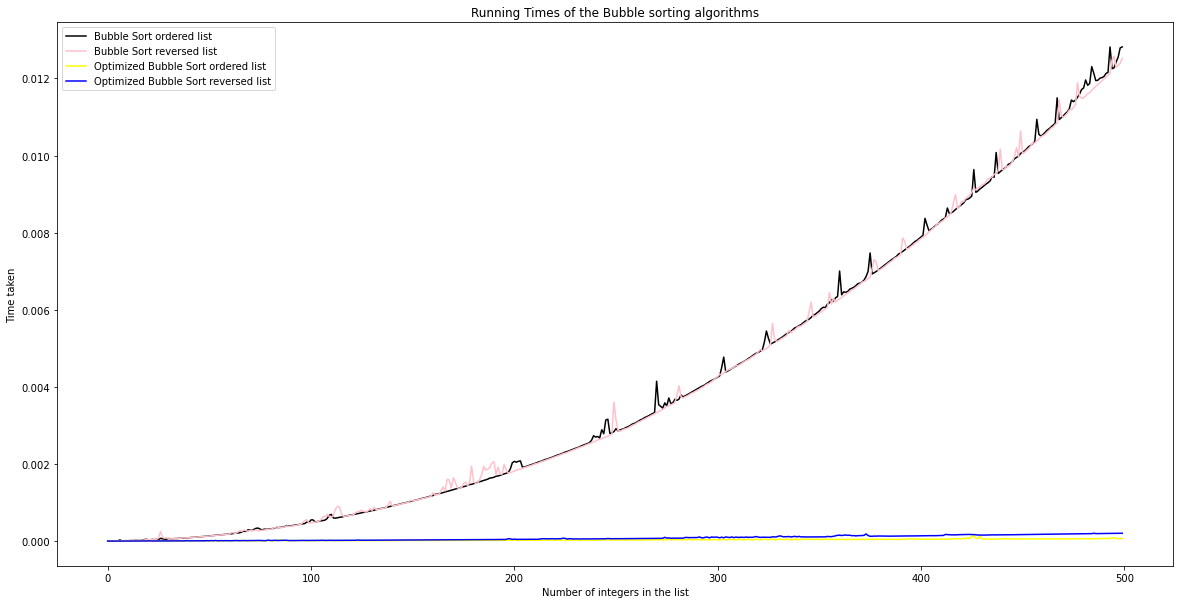

In [72]:
#Plotting Bubble sorting algorithms and associated run times on the same graph for comparison.

plt.figure(figsize=(20,10))
plt.xlabel('Number of integers in the list')
plt.ylabel('Time taken')
plt.title('Running Times of the Bubble sorting algorithms')
plt.plot(list_ordered, bubble_sort_times_ordered, label='Bubble Sort ordered list', color="black")
plt.plot(list_ordered, bubble_sort_times, label='Bubble Sort reversed list', color="pink")
plt.plot(list_ordered, optimized_bubble_sort_times_ordered, label='Optimized Bubble Sort ordered list', color="yellow")
plt.plot(list_ordered, optimized_bubble_sort_times, label='Optimized Bubble Sort reversed list', color="blue")
plt.legend()

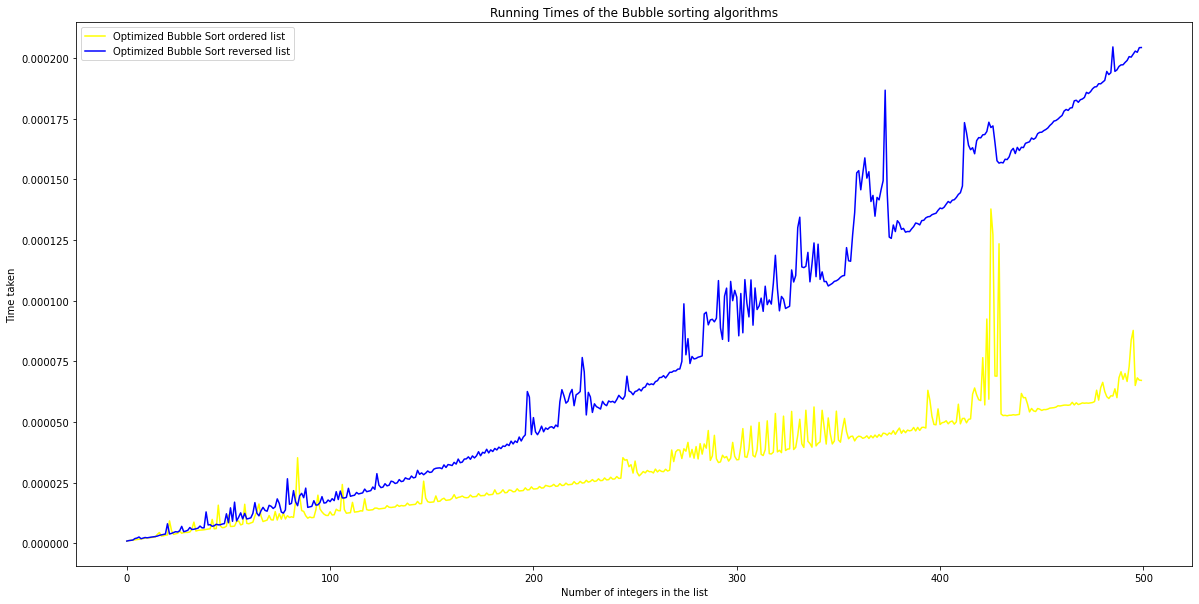

In [78]:
#Plotting Bubble sorting algorithms and associated run times on the same graph for comparison.
#because of unclarity of above graph, the following has been carried out

plt.figure(figsize=(20,10))
plt.xlabel('Number of integers in the list')
plt.ylabel('Time taken')
plt.title('Running Times of the Bubble sorting algorithms')
plt.plot(list_ordered, optimized_bubble_sort_times_ordered, label='Optimized Bubble Sort ordered list', color="yellow")
plt.plot(list_ordered, optimized_bubble_sort_times, label='Optimized Bubble Sort reversed list', color="blue")
plt.legend()

The above graphs show the different bubble sorting algorithms on the ordered and reversed list. It is interesting that the bubble sort algorithm complexity O(n^2) is the same for both types of lists unless the change is made in the algorithm and the running time is nearly identical. The second graph clearly shows the difference for the optimized bubble sort algorithm depending on whether or not the list is ordered.
- O(n^2)
- Ω(n)


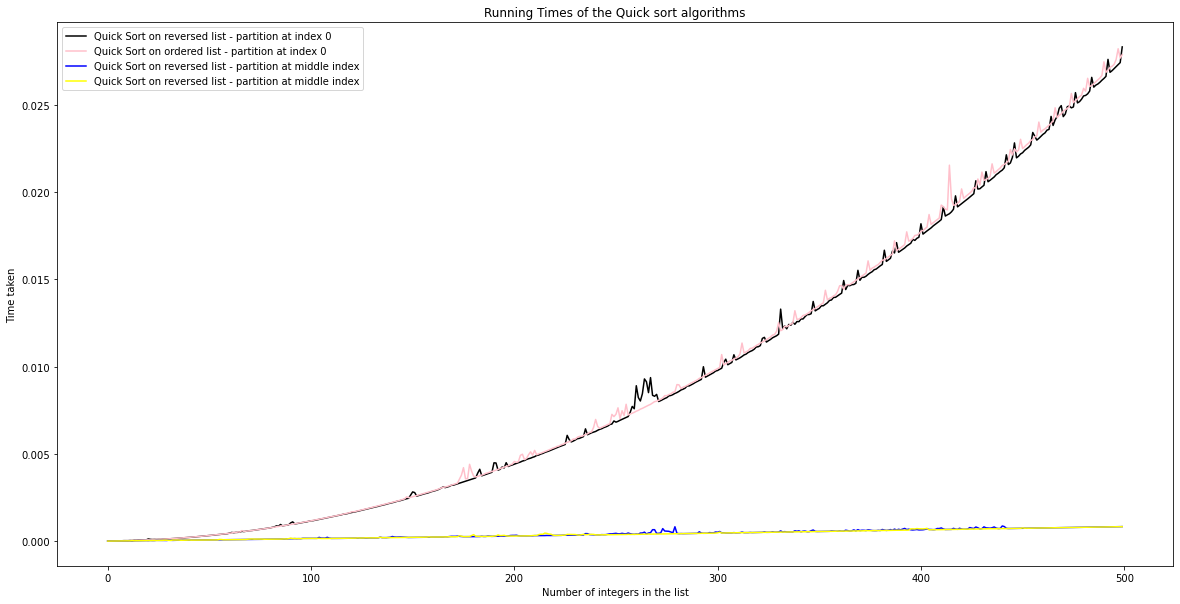

In [19]:
#Plotting Quick sorting algorithms and associated run times on the same graph for comparison.

plt.figure(figsize=(20,10))
plt.xlabel('Number of integers in the list')
plt.ylabel('Time taken')
plt.title('Running Times of the Quick sort algorithms')
plt.plot(list_ordered, quick_sort_times, label='Quick Sort on reversed list - partition at index 0', color="black")
plt.plot(list_ordered, quick_sort_times_ordered, label='Quick Sort on ordered list - partition at index 0', color="pink")
plt.plot(list_ordered, quick_sort_middle_times, label='Quick Sort on reversed list - partition at middle index', color="blue")
plt.plot(list_ordered, quick_sort_middle_times_ordered, label='Quick Sort on reversed list - partition at middle index', color="yellow")
plt.legend()

Again similar to the bubble sort algorithm, for the quick sort algorithm, when the pivot is at 0, the algorithm has a time complexity of O(n^2) regardless of what list it is processing. The reasoning behind this has already been explained above (all elements are always moving to the right/left of the pivot). When the pivot is the middle number, the complexity is O(nlog(n)) - again, the reasoning for this has been explained above (in short terms, at each partition, n/2 either side of the pivot). 
- O(n^2)
- Ω(nlog(n))

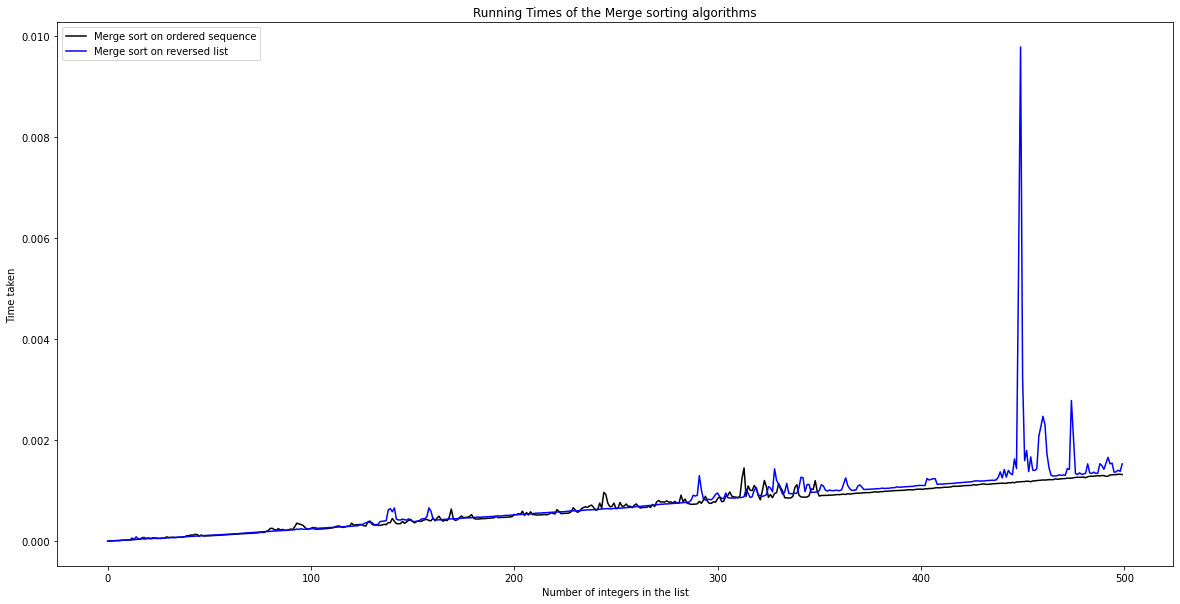

In [76]:
#Plotting Merge sorting algorithms and associated run times on the same graph for comparison.

plt.figure(figsize=(20,10))
plt.xlabel('Number of integers in the list')
plt.ylabel('Time taken')
plt.title('Running Times of the Merge sorting algorithms')
plt.plot(list_ordered, merge_sort_times_ordered, label='Merge sort on ordered sequence', color="black")
plt.plot(list_ordered, merge_sort_times, label='Merge sort on reversed list', color="blue")
#plt.plot(list_ordered, quick_sort_middle_times_ordered, label='Quick Sort on reversed list - partition at middle index', color="yellow")
plt.legend()

Similar to other algorithms assessed above, the merge sort algorithm has nearly the exact same runtime on both lists. This is because the same operations are still being carried out even though the list is sorted.
- O(nlog(n))
- Ω(nlog(n))

Reasoning for the different complexities:

Bubble Sort: As there is a nested loop in the algorithm and for n items, there is n possible swaps, it is O(n^2). The lower bound or Big-Ω would be Ω(n). This is when the algorithm goes through n elements but does not need to swap any. 

Merge Sort: As was shown in Assignment 1 with binary search, dividing a list in half can be done log(n) times with n being equal to the size of the list. With the case of the Merge Sort algorithm, there is also the need to merge the elements back together (when they are sorted). Each element in the list is processed in linear time which results in O(nlog(n)). In terms of the lower bound, the merge sort has the same time complexity. This is because regardless of the list being sorted or unsorted, the same operations are carried out.

Quick Sort: The algorithm selects a pivot at index 0 and moves the elements to the right/left. This process continues until it is left with single elements. For the reversed list, this will mean that all the elements will be put to the right each time the pivot is selected. This means that the list of n items is being divided into a list of 0 elements and n-1 elements, then 0 elements and n-2 elements on the next level and so on. This results in Big O complexity of O(n^2). For the lower-bound, it is Ω(n(log(n)). This is because the list keeps getting divided in half with n/2 elements going to the right and left of the pivot. As explained in merge sort, this is log(n) complexity. It is multiplied by n for the number of elements it processes.

Overall an interesting analysis - especially when it is made clear that some of the algorithms have the same running time on both the sorted and reversed list. Where any graph was deemed to be confusing or unclear, the runtimes were presented on another graph to give a clearer understanding - e.g if it was O(nlog(n)), it may appear to be linear on one graph but comparing it to another algorithm's runtime, it is clearly logarithmic. The use of the optimized bubble sort algorithm does at times skew the expectations because of how fast it is running but this is noted throughout the analysis and the reasoning behind this. It was interesting to see how an algorithm can be made more efficient, reducing its runtimes. All results were as expected and correspond with the analysis of the three algorithms in the introduction.

# Part 2

## Apply and run Dijkstra’s shortest path algorithm and discuss your results.

#### Please see attached document "drawings.pdf" for this section's workings.

Process taken: Select node 'A' to begin with so it is given a distance of 0. Distances of all other nodes is currently undetermined so given a distance of infinity. Check the distance from node A to the other nodes it connects with by one edge. Change the distance of each of these nodes from infinity. Move to the node that has the shortest distance and add this node to the visited. Repeat process from this node for the nodes this node connects with with one edge changing the distance to the nodes if it is shorter than originally thought. Once all nodes have been visited, the process is complete. 

Discussion of results: Results of the different shortest distances and weights are available in the document. It appears that on some occassion, like [A-E-F-C] which is a distance of 14 is shorter than [A-H-C] which has a distance of 15 even though the path has an extra node. As time went on, the process got quicker as there is less changes to the table that I was working with and less changes to the distance to each node (as the previous distance already calculated was shorter). It is interesting to see that Dijkstra's algorithm considers all different pathway options to a destination before determining the result. Overall, a convenient way of finding the shortest distance between the nodes and a selected source in a graph. 

<br>
The first part to this section uses the NetworkX built-in function <code>single_source_dijkstra</code>. The graph and the source node are given as parameter.
<br>
<br>
The second part employs material from the lab/lectures and uses Dijkstra's algorithm (as outlined in assignment brief).


In [149]:
#same layout as lab 8 

#creating graph
G = nx.Graph()

#adding the different nodes to graph G
G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_node('D')
G.add_node('E')
G.add_node('F')
G.add_node('G')
G.add_node('H')

#adding the edges and weights
G.add_edge('A', 'B', weight=5)
G.add_edge('A', 'H', weight=8)
G.add_edge('A', 'E', weight=9)
G.add_edge('H', 'F', weight=6)
G.add_edge('H', 'C', weight=7)
G.add_edge('F', 'G', weight=13)
G.add_edge('E', 'F', weight=4)
G.add_edge('D', 'G', weight=9)
G.add_edge('D', 'C', weight=3)
G.add_edge('B', 'C', weight=12)
G.add_edge('E', 'G', weight=20)
G.add_edge('F', 'C', weight=1)
G.add_edge('E', 'H', weight=5)
G.add_edge('B', 'D', weight=15)
G.add_edge('B', 'H', weight=4)
G.add_edge('C', 'G', weight=11)


print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 8
Number of edges: 16
Average degree:   4.0000


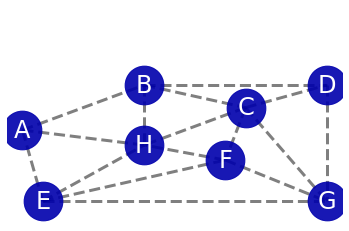

In [150]:
pos= {'A': [-1.1, -2], 'B': [-.5,  -.8], 'C': [0,-1.4], 'D': [0.4, -0.8], 'E': [-1, -3.9], 'F': [-0.1, -2.8], 'G': [.4,-3.9], 'H': [ -.5, -2.4]}
nx.draw_networkx_nodes(G, pos, node_size=1500, alpha=.9, node_color='#0000ac')
nx.draw_networkx_edges(G, pos,
                           width=3, alpha=0.5, edge_color='k', style='dashed')
nx.draw_networkx_labels(G, pos, font_size=24, font_family='sans-serif', font_color='white')
plt.ylim([-4.5,1.3])
limits=plt.axis('off') # turn of axis

In [151]:
#reference for this function: https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.shortest_paths.weighted.single_source_dijkstra.html

length, path=nx.single_source_dijkstra(G,'A')

In [152]:
#were not matching up below so put both dictionaries in order

length = {key: value for key, value in sorted(length.items())}
path = {key: value for key, value in sorted(path.items())}

In [153]:
#displaying the shortest route and distance to each node from 'A'.

counter = range(len(length))   #initializing variable counter to be length of variable length

for i in counter:
    res = list(length.keys())[i]  #https://www.geeksforgeeks.org/python-get-the-first-key-in-dictionary/
    value = list(length.values())[i]    #getting the values or distances
    route_taken = list(path.values())[i]  #getting the path taken
    print("The shortest distance from A to " + res + " was " + str(value))
    print("The route taken was as follows: " + str(route_taken))
    print()

The shortest distance from A to A was 0
The route taken was as follows: ['A']

The shortest distance from A to B was 5
The route taken was as follows: ['A', 'B']

The shortest distance from A to C was 14
The route taken was as follows: ['A', 'E', 'F', 'C']

The shortest distance from A to D was 17
The route taken was as follows: ['A', 'E', 'F', 'C', 'D']

The shortest distance from A to E was 9
The route taken was as follows: ['A', 'E']

The shortest distance from A to F was 13
The route taken was as follows: ['A', 'E', 'F']

The shortest distance from A to G was 25
The route taken was as follows: ['A', 'E', 'F', 'C', 'G']

The shortest distance from A to H was 8
The route taken was as follows: ['A', 'H']



In [154]:
#code to make the shortest path three
#new graph
shortest_path_tree = nx.Graph()

counter = range(len(length))

for i in counter:
    res = list(length.keys())[i]
    shortest_path_tree.add_node(res)  #adding each element from the list above as a node
    
#hardcoded originally   
#shortest_path_tree.add_node('A')
#shortest_path_tree.add_node('B')
#shortest_path_tree.add_node('C')
#shortest_path_tree.add_node('D')
#shortest_path_tree.add_node('E')
#shortest_path_tree.add_node('F')
#shortest_path_tree.add_node('G')
#shortest_path_tree.add_node('H')

    
for path in path.values():
        for i in range(len(path)-1):
            if G.has_edge(path[i], path[i+1]):
                shortest_path_tree.add_edge(path[i], path[i + 1])  #adding the edges to the graph

#hardcoded originally 
#shortest_path_tree.add_edge('A', 'B', weight=5)
#shortest_path_tree.add_edge('A', 'H', weight=8)
#shortest_path_tree.add_edge('A', 'E', weight=9)
#shortest_path_tree.add_edge('E', 'F', weight=4)
#shortest_path_tree.add_edge('F', 'C', weight=1)
#shortest_path_tree.add_edge('C', 'D', weight=3)
#shortest_path_tree.add_edge('C', 'G', weight=11)

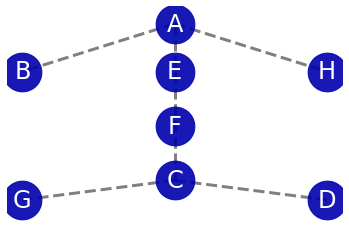

In [155]:
#code adapted from lab 8
pos= {'A': [2.5,4.2], 'B': [1,  2], 'C': [2.5,-3], 'D': [4, -3.9], 'E': [2.5, 2], 'F': [2.5, -.5], 'G': [1,-3.9], 'H': [ 4, 2]}
nx.draw_networkx_nodes(shortest_path_tree, pos, node_size=1500, alpha=.9, node_color='#0000ac')
nx.draw_networkx_edges(shortest_path_tree, pos,
                           width=3, alpha=0.5, edge_color='k', style='dashed')
nx.draw_networkx_labels(shortest_path_tree, pos, font_size=24, font_family='sans-serif', font_color='white')
plt.ylim([-5,5])
limits=plt.axis('off') # turn of axis

## Using Dijkstra's Algorithm

In [156]:
#This code is from lab 8

import collections
import math

class Graph:
    def __init__(self):
        self.vertices = set()
        # makes the default value for all vertices an empty list
        self.edges = collections.defaultdict(list)
        self.weights = {}
 
    def add_vertex(self, value):
        self.vertices.add(value)
 
    def add_edge(self, from_vertex, to_vertex, distance):
        if from_vertex == to_vertex: pass  # no cycles allowed
        self.edges[from_vertex].append(to_vertex)
        self.edges[to_vertex].append(from_vertex) 
        self.weights[(from_vertex, to_vertex)] = distance
        self.weights[(to_vertex, from_vertex)] = distance 
 
    def __str__(self):
        string = "Vertices: " + str(self.vertices) + "\n"
        string += "Edges: " + str(self.edges) + "\n"
        string += "Weights: " + str(self.weights)
        return string

In [157]:
new_graph = Graph()  #creating object of class

#creating the graph
new_graph.add_vertex("A")
new_graph.add_vertex("B")
new_graph.add_vertex("C")
new_graph.add_vertex("D")
new_graph.add_vertex("E")
new_graph.add_vertex("F")
new_graph.add_vertex("G")
new_graph.add_vertex("H")

new_graph.add_edge('A', 'B', 5)
new_graph.add_edge('A', 'E', 9)
new_graph.add_edge('A', 'H', 8)
new_graph.add_edge('B', 'H', 4)
new_graph.add_edge('E', 'F', 4)
new_graph.add_edge('C', 'D', 3)
new_graph.add_edge('G', 'D', 9)
new_graph.add_edge('F', 'G', 13)
new_graph.add_edge('E', 'G', 20)
new_graph.add_edge('H', 'F', 6)
new_graph.add_edge('H', 'C', 7)
new_graph.add_edge('F', 'C', 1)
new_graph.add_edge('C', 'B', 12)
new_graph.add_edge('D', 'B', 15)
new_graph.add_edge('G', 'C', 11)
new_graph.add_edge('E', 'H', 5)

In [158]:
#This code is from lab 8 - needed to make delta variable so could access it later on outside function

global delta
def dijkstra(graph, start):
    

    # initializations
    S = set()

    # delta represents the length shortest distance paths from start -> v, for v in delta.
    # We initialize it so that every vertex has a path of infinity (this line will break if you run python 2)
    delta = dict.fromkeys(list(graph.vertices), math.inf)
    previous = dict.fromkeys(list(graph.vertices), None)

    # then we set the path length of the start vertex to 0
    delta[start] = 0

    # while there exists a vertex v not in S
    while S != graph.vertices:
        # let v be the closest vertex that has not been visited...it will begin at 'start'
        v = min((set(delta.keys()) - S), key=delta.get)

        # for each neighbor of v not in S
        for neighbor in set(graph.edges[v]) - S:
            new_path = delta[v] + graph.weights[v,neighbor]

            # is the new path from neighbor through
            if new_path < delta[neighbor]:
                # since it's optimal, update the shortest path for neighbor
                delta[neighbor] = new_path

                # set the previous vertex of neighbor to v
                previous[neighbor] = v
        S.add(v)
    
    

    return (delta, previous)

In [159]:
#This code is from lab 8

def shortest_path(graph, start, end):
    '''Uses dijkstra function in order to output the shortest path from start to end
    '''

    delta, previous = dijkstra(graph, start)
    

    path = []
    vertex = end

    while vertex is not None:
        path.append(vertex)
        vertex = previous[vertex]

    path.reverse()
    
    #for i in delta:
     #   print(delta.get(i))

       
        
    return path

In [160]:
vertices = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

path_list = []

for i in vertices:
    list_test = []
    distance = delta[i]
    print("Shortest path from A to " + i + " is: ")
    list_test.append(shortest_path(new_graph, 'A', i))
    path_list.append(shortest_path(new_graph, 'A', i))
    list_test.append(distance)
    #print(list_test)
    print(shortest_path(new_graph, 'A', i))
    print("The distance is " + str(distance))
    print()

Shortest path from A to A is: 
['A']
The distance is 0

Shortest path from A to B is: 
['A', 'B']
The distance is 5

Shortest path from A to C is: 
['A', 'E', 'F', 'C']
The distance is 14

Shortest path from A to D is: 
['A', 'E', 'F', 'C', 'D']
The distance is 17

Shortest path from A to E is: 
['A', 'E']
The distance is 9

Shortest path from A to F is: 
['A', 'E', 'F']
The distance is 13

Shortest path from A to G is: 
['A', 'E', 'F', 'C', 'G']
The distance is 25

Shortest path from A to H is: 
['A', 'H']
The distance is 8



In [161]:
print(path_list)

[['A'], ['A', 'B'], ['A', 'E', 'F', 'C'], ['A', 'E', 'F', 'C', 'D'], ['A', 'E'], ['A', 'E', 'F'], ['A', 'E', 'F', 'C', 'G'], ['A', 'H']]


In [162]:
shortest_path_tree_two = nx.Graph()

#same code to create the nodes as above
counter = range(len(length))
for i in counter:
    res = list(length.keys())[i]
    shortest_path_tree.add_node(res)


#creating shortest path tree    
for path in path_list:
        for i in range(len(path)-1):
            if G.has_edge(path[i], path[i+1]):
                shortest_path_tree_two.add_edge(path[i], path[i + 1])

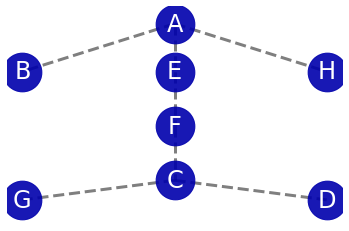

In [163]:
#code adapted from lab 8

pos= {'A': [2.5,4.2], 'B': [1,  2], 'C': [2.5,-3], 'D': [4, -3.9], 'E': [2.5, 2], 'F': [2.5, -.5], 'G': [1,-3.9], 'H': [ 4, 2]}
nx.draw_networkx_nodes(shortest_path_tree_two, pos, node_size=1500, alpha=.9, node_color='#0000ac')
nx.draw_networkx_edges(shortest_path_tree_two, pos,
                           width=3, alpha=0.5, edge_color='k', style='dashed')
nx.draw_networkx_labels(shortest_path_tree_two, pos, font_size=24, font_family='sans-serif', font_color='white')
plt.ylim([-5,5])
limits=plt.axis('off') # turn of axis

Result & conclusion: Both approaches show the same result. By looking at the shortest path trees, we can see that the shortest path to 'G' is 'A' > 'E' > 'F' > 'C' > 'G'. This is the same as the findings in the first section and shown in the table titled "The best path to each Node" in the pdf. Computing the shortest path tree for a selected node is convenient to see the shortest route to each node from the specified node.

# Part 3

## Identify the optimal bridge building solution to connect 7 islands using a Minimum Spanning Tree and Prim’s Algorithm.

#### Please see attached document "drawings.pdf" for this section's workings.

Process Taken: Attempted to do it the way it had been done in the lecture (as can be seen in the PDF) but found it hard to read with the number of edges in this graph. Made a table to signify all possible edges to be considered as the next one to use. An edge was chosen if it was the smallest, had not already been selected previously and did not create any cycles. In order to speed up the process in the future, one table could be used and rows could be added to for every unique node visited. There is the potential to go through each edge per row and cross them off if they create a cycle and hence should not be considered at all going forward. 

Discussion of results: Can see that some nodes have more edges connecting to them in the MST than others. For the 8 nodes, there are 7 edges used to create the minimum spanning tree which is as expected as a MST has V - 1 edges where V is the number of vertices. 

In [196]:
G = nx.Graph()
G.add_node('1')
G.add_node('2')
G.add_node('3')
G.add_node('4')
G.add_node('5')
G.add_node('6')
G.add_node('7')
G.add_node('8')

G.add_edge('1', '2', weight=240)
G.add_edge('1', '3', weight=210)
G.add_edge('1', '4', weight=340)
G.add_edge('1', '5', weight=280)
G.add_edge('1', '6', weight=200)
G.add_edge('1', '7', weight=345)
G.add_edge('1', '8', weight=120)
G.add_edge('2', '3', weight=265)
G.add_edge('2', '4', weight=175)
G.add_edge('2', '5', weight=215)
G.add_edge('2', '6', weight=180)
G.add_edge('2', '7', weight=185)
G.add_edge('2', '8', weight=155)
G.add_edge('3', '4', weight=260)
G.add_edge('3', '5', weight=115)
G.add_edge('3', '6', weight=350)
G.add_edge('3', '7', weight=435)
G.add_edge('3', '8', weight=195)
G.add_edge('4', '5', weight=160)
G.add_edge('4', '6', weight=330)
G.add_edge('4', '7', weight=295)
G.add_edge('4', '8', weight=230)
G.add_edge('5', '6', weight=360)
G.add_edge('5', '7', weight=400)
G.add_edge('5', '8', weight=170)
G.add_edge('6', '7', weight=175)
G.add_edge('6', '8', weight=205)
G.add_edge('7', '8', weight=305)


print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 8
Number of edges: 28
Average degree:   7.0000


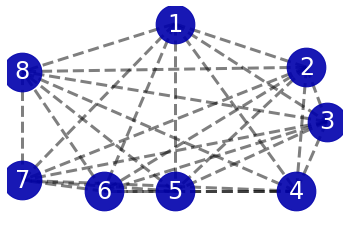

In [197]:
#code adapted from lab 8
pos= {'1': [2.5,4.2], '2': [3.8,  2.2], '3': [4,-.3], '4': [3.7, -3.5], '5': [2.5, -3.5], '6': [1.8, -3.5], '7': [1,-3], '8': [ 1, 2]}
nx.draw_networkx_nodes(G, pos, node_size=1500, alpha=.9, node_color='#0000ac')
nx.draw_networkx_edges(G, pos,
                           width=3, alpha=0.5, edge_color='k', style='dashed')
nx.draw_networkx_labels(G, pos, font_size=24, font_family='sans-serif', font_color='white')
plt.ylim([-5,5])
limits=plt.axis('off') # turn of axis

In [198]:
#from networkx import tree
#from networkx.algorithms import tree

In [199]:
#from networkx.algorithms import tree

In [200]:
mst = list(tree.minimum_spanning_tree(G, algorithm='prim'))

In [201]:
mst

['1', '2', '3', '4', '5', '6', '7', '8']

In [202]:
mst = tree.minimum_spanning_tree(G, algorithm='prim')
print(mst)

In [203]:
T = nx.minimum_spanning_tree(G)

In [204]:
print(T)

In [205]:
sorted(T.edges(data=True))

[('1', '8', {'weight': 120}),
 ('2', '6', {'weight': 180}),
 ('2', '8', {'weight': 155}),
 ('3', '5', {'weight': 115}),
 ('4', '5', {'weight': 160}),
 ('5', '8', {'weight': 170}),
 ('6', '7', {'weight': 175})]

In [206]:
from networkx.algorithms import tree

In [215]:
mst = tree.minimum_spanning_edges(G, algorithm="prim", data=False)
edgelist = list(mst)
print("MST edges:")
print(edgelist)

MST edges:
[('2', '8'), ('8', '1'), ('8', '5'), ('5', '3'), ('5', '4'), ('2', '6'), ('6', '7')]


In [208]:
mst = tree.minimum_spanning_edges(G, algorithm='prim', weight='weight', keys=True, data=True, ignore_nan=False)

In [209]:
edgelist = list(mst)

In [214]:
print("MST (edges and weights):")
print(edgelist)

MST (edges and weights):
[('2', '8', {'weight': 155}), ('8', '1', {'weight': 120}), ('8', '5', {'weight': 170}), ('5', '3', {'weight': 115}), ('5', '4', {'weight': 160}), ('2', '6', {'weight': 180}), ('6', '7', {'weight': 175})]


In [211]:
length = ['1', '2', '3', '4', '5', '6', '7', '8']

In [212]:
mst_path = nx.Graph()

counter = range(len(length))
for i in counter:
    res = length[i]
    mst_path.add_node(res)

#creating shortest path tree    
for i in range(len(edgelist)):
    if G.has_edge(edgelist[i][0], edgelist[i][1]):
        mst_path.add_edge(edgelist[i][0], edgelist[i][1])

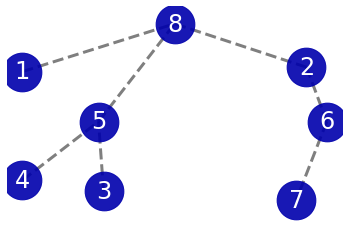

In [213]:
#code adapted from lab 8
pos= {'1': [1, 2], '2': [3.8,  2.2], '3': [1.8, -3.5], '4': [1,-3], '5': [1.75, -.3], '6': [4,-.3 ], '7': [3.7, -3.9], '8': [ 2.5, 4.2]}
nx.draw_networkx_nodes(mst_path, pos, node_size=1500, alpha=.9, node_color='#0000ac')
nx.draw_networkx_edges(mst_path, pos,
                           width=3, alpha=0.5, edge_color='k', style='dashed')
nx.draw_networkx_labels(mst_path, pos, font_size=24, font_family='sans-serif', font_color='white')
plt.ylim([-5,5])
limits=plt.axis('off') # turn of axis

Result: The MST graph matches the one drawn out for Part 1 of this section.

Unlike Dijkstra's algorithm, computing the MST did not factor around an initial source node in which the accumulative shortest distance to each node is being calculated and stored. Instead, it is the minimum weighted edge from any of the visited nodes (as long as it does not create a cycle) to another node that is stored and added to the tree. In other words, Dijkstra's algorithm finds the minimum distance from a specified node to all the other nodes whereas Prim's algorithm for finding the Minimum Spanning Tree connects the nodes by keeping all the weights to a minimum (not concentrating on the distance from a particular node to the rest of the nodes). 

In [217]:
# --- End of Assignment --- 